In [8]:
from prodUrlFetcher import top_product_url
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [9]:
userAgents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 Edg/123.0.2420.81',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 14.4; rv:124.0) Gecko/20100101 Firefox/124.0',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_4_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.4.1 Safari/605.1.15',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_4_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
        'Mozilla/5.0 (X11; Linux i686; rv:124.0) Gecko/20100101 Firefox/124.0'
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/116.0',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/115.0',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0',
        'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/116.0',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 Edg/115.0.1901.188',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.79 Safari/537.36 Edge/14.14393'
        ]

In [10]:
rating = []
reviews = []
fiveStarRating = []
fourStarRating = []
threeStarRating = []
twoStarRating = []
oneStarRating = []

In [11]:
def scraping_top_url():
    user_input = input("Enter a product: ")
    url = top_product_url(user_input)
    print(url)
    scraping_rating(url)
    # scraping_reviews(url)

def scraping_rating(rating_url):
    
    max_tries = 21
    attempts = 0
    response = None

    while attempts < max_tries and not response:
        for i in userAgents:
            try:
                response = requests.get(rating_url, headers={'User_Agent': i})
                if response.status_code == 200:
                    break
            except requests.RequestException as e:
                print(f"An error occurred: {e}")
            time.sleep(1)
        attempts += 1
    
    if response.ok:
        soup = BeautifulSoup(response.content, 'html.parser')
        x = soup.find_all("td", class_ = "a-text-right a-nowrap a-nowrap")
        for td in x:
            rating_percentage = td.find_all("a", class_ = "a-size-base a-link-normal")
            zero_percentage = td.find_all("span", class_ = "a-size-base")
            for zero in zero_percentage:
                rating.append(zero.get_text())
            for percentage in rating_percentage:
                rating.append(percentage.get_text())
        print(rating)

    # df = pd.DataFrame(rating, columns=["Stars"])
    # df.to_csv("Ratings_of_prod", index=False)
        

scraping_top_url()

https://www.amazon.in/Apple-iPhone-Pro-Max-256/dp/B0CHX68YG9/ref=sr_1_1?dib=eyJ2IjoiMSJ9.XqEI3jFpzXkt1EB1X4u2LQtuW1yD4Bhj-l0KteWNTVcm4dNwa2HNimSIR7rIdyzECkEfyLIuy8DdXMqyTUiU99dR3vlOdRG97em7P_UXx5BiQ7SMYizdB0q_PJkLYOpTrf5aiL9ahBODlRh0Dp-mFGVrjK_cfsWqvN6kq_rC_-bMJiJR08iXSbqa93dH2WJ5tfWm32YzhqMRa0VdTH59ZDP6IgrEau2Xl6qDBxgIQes.dqlG01ovkQzhsNEd6r_l3G0pZ8C6zCOuuD974pXrOKM&dib_tag=se&keywords=iphone+15+pro+max&qid=1714472643&sr=8-1
['78%', '9%', '3%', '2%', '8%']


In [12]:
# Convert percentages to float for graphing
star_percentages = [float(rates.strip('%')) for rates in rating]

st = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']

with open('star_ratings.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Star', 'Percentage'])
    for star, percentage in zip(st, star_percentages):
        writer.writerow([star, percentage])

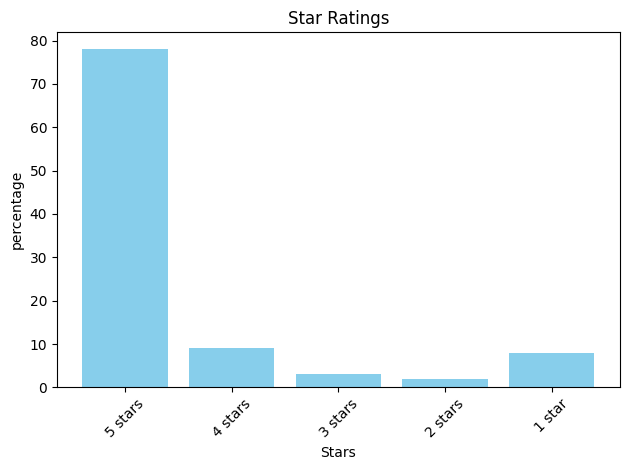

In [13]:
plt.bar(st, star_percentages, color="skyblue")
plt.xlabel("Stars")
plt.ylabel("percentage")
plt.title("Star Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()